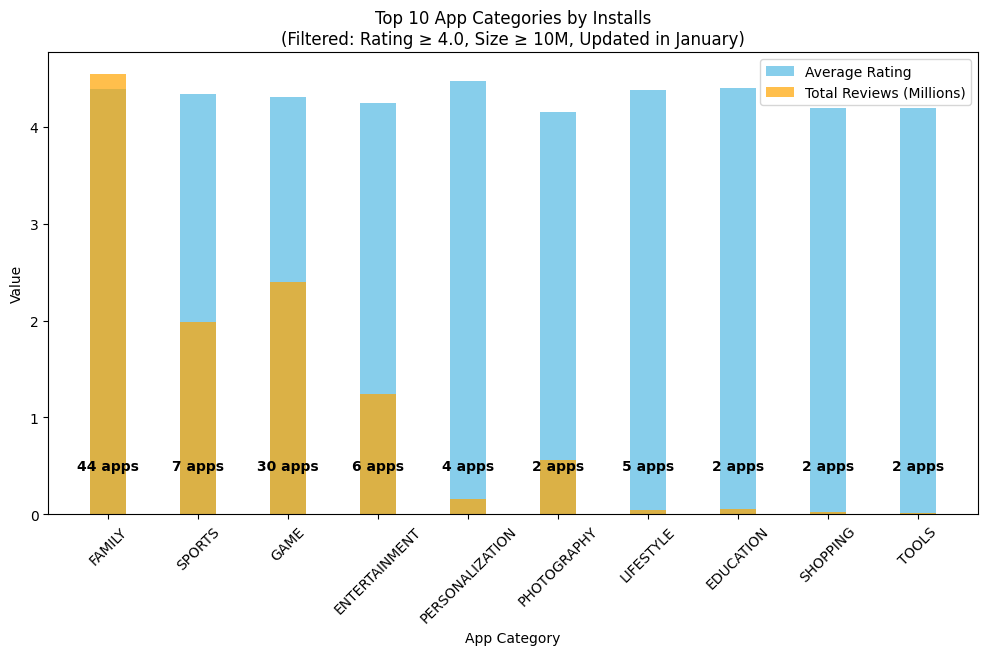


📌 **Filtered Apps Below 10M in Each Category:**

**FAMILY**: Ice Cream Jump, A Word A Day, Expert C Programming - Learn C Coding Easily
**SPORTS**: Top Mercato: football news, The Rules of Golf, BD CRICKET LIVE
**GAME**: My Boy! Free - GBA Emulator, Map Callouts for CS:GO, Crazy Wheels
**ENTERTAINMENT**: Complete Spanish Movies
**PERSONALIZATION**: Freeme Launcher—Stylish Theme, Sun Rise Free Live Wallpaper, J. Cole Rapper Wallpaper HD
**PHOTOGRAPHY**: HD Camera Pro for Android, AJ Cam, Selfie With Champion AJ Style
**LIFESTYLE**: Pronunciation and know the name of the caller from his number, I am rich, Ba Zi Fortune
**EDUCATION**: Homework Planner
**SHOPPING**: All States Ag Parts
**TOOLS**: Mobile Number Tracker, Flashlight Ultimate, Carrier Air Conditioner


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pytz

file_path = "Play Store Data.csv"  
apps_df = pd.read_csv(file_path)


def convert_size(size):
    if isinstance(size, str):
        if "M" in size:
            return float(size.replace("M", ""))
        elif "K" in size:
            return float(size.replace("K", "")) / 1000  # Convert KB to MB
    return None

apps_df["Size"] = apps_df["Size"].apply(convert_size)


apps_df["Reviews"] = pd.to_numeric(apps_df["Reviews"], errors="coerce")

apps_df["Installs"] = apps_df["Installs"].astype(str)
apps_df["Installs"] = apps_df["Installs"].str.replace(",", "").str.replace("+", "")
apps_df["Installs"] = pd.to_numeric(apps_df["Installs"], errors="coerce")


apps_df["Last Updated"] = pd.to_datetime(apps_df["Last Updated"], errors="coerce")
apps_df = apps_df[apps_df["Last Updated"].dt.month == 1]


apps_df = apps_df.dropna(subset=["Size", "Reviews", "Installs", "Rating"])


filtered_apps = apps_df[(apps_df["Rating"] >= 4.0) & (apps_df["Size"] >= 10)]


top_categories = (
    filtered_apps.groupby("Category")
    .agg({"Rating": "mean", "Reviews": "sum", "Installs": "sum", "App": "count"})
    .sort_values("Installs", ascending=False)
    .head(10)  # Select top 10 categories
)


small_apps = apps_df[(apps_df["Size"] < 10) & (apps_df["Category"].isin(top_categories.index))]


filtered_apps_info = {}
for category in top_categories.index:
    small_apps_in_category = small_apps[small_apps["Category"] == category]["App"].head(3).tolist()
    if small_apps_in_category:
        filtered_apps_info[category] = small_apps_in_category


ist = pytz.timezone("Asia/Kolkata")
current_time = datetime.datetime.now(ist).time()

if datetime.time(15, 0) <= current_time <= datetime.time(21, 0):
    try:
        
        fig, ax = plt.subplots(figsize=(12, 6))
        width = 0.4  
        categories = top_categories.index

        bar1 = ax.bar(categories, top_categories["Rating"], width, label="Average Rating", color="skyblue")
        bar2 = ax.bar(categories, top_categories["Reviews"] / 1e6, width, label="Total Reviews (Millions)", color="orange", alpha=0.7)

       
        ax.set_xlabel("App Category")
        ax.set_ylabel("Value")
        ax.set_title("Top 10 App Categories by Installs\n(Filtered: Rating ≥ 4.0, Size ≥ 10M, Updated in January)")
        ax.legend()
        plt.xticks(rotation=45)

       
        for i, category in enumerate(categories):
            count = top_categories.loc[category, "App"]
            ax.text(i, max(top_categories["Rating"].max(), (top_categories["Reviews"].max() / 1e6)) * 0.1, 
                    f"{count} apps", ha="center", fontsize=10, fontweight="bold", color="black")

        plt.show()

        # Display filtered apps below 10M size
        print("\n📌 **Filtered Apps Below 10M in Each Category:**\n")
        for category, apps in filtered_apps_info.items():
            print(f"**{category}**: {', '.join(apps)}")

    except Exception as e:
        print("Error while plotting the chart:", e)
else:
    print("This chart is only available between 3 PM and 5 PM IST.")
